<a href="https://colab.research.google.com/github/Ashubapun/McDonalds-Case-Study/blob/main/McDonalds_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Step 1: Deciding (not) to Segment
 McDonald’s can take the position that it caters to the entire market and that
 there is no need to understand systematic differences across market segments.
 Alternatively, McDonald’s can take the position that, despite their market power,
 there is value in investigating systematic heterogeneity among consumers and
 harvest these differences using a differentiated marketing strategy.

## Step 2: Specifying the Ideal Target Segment

McDonald’s management must identify key features that make a market segment attractive for targeting. The segment should be homogeneous, distinct, large enough to justify a customized marketing mix, aligned with McDonald’s strengths, identifiable, and reachable. For segment attractiveness, the focus is on selecting segments with a positive perception of McDonald’s and frequent fast food consumption. While solidifying their position in strong segments, McDonald’s may also explore segments that currently have negative perceptions to understand and potentially alter these views. The key criteria for attractiveness in the case study are liking and frequently eating at McDonald’s, which will guide target segment selection.

## Step 3: Collecting Data
 The data set contains responses from 1453 adult Australian consumers relating to
 their perceptions of McDonald’s with respect to the following attributes: YUMMY,
 CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
 HEALTHY,and DISGUSTING.Theseattributes emergedfromaqualitative study con
ducted in preparation of the survey study. For each of those attributes, respondents
 provided either a YES response (indicating that they feel McDonald’s possesses
 this attribute), or a NO response (indicating that McDonald’s does not possess this
 attribute).
 In addition, respondents indicated their AGE and GENDER. Had this data been
 collected for a real market segmentation study, additional information– such as
 details about their dining out behaviour, and their use of information channels
would have been collected to enable the development of a richer and more detailed
 description of each market segment.


## Step 4: Exploring Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.utils import resample


In [ ]:
mcdonalds = pd.read_csv('/content/mcdonalds.csv')
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
mcdonalds.shape

(1453, 15)

In [ ]:
mcdonalds.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
MD_x = mcdonalds.iloc[:, 0:11].values
print(MD_x)

[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [ ]:
MD_x = np.where(MD_x == "Yes", 1, 0)
print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [ ]:
column_means = np.round(MD_x.mean(axis=0), 2)
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [ ]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
MD_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [ ]:
explained_variance = np.round(pca.explained_variance_ratio_, 2)
cumulative_variance = np.round(np.cumsum(explained_variance), 2)

print("Explained Variance by Component:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance by Component: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
Cumulative Explained Variance: [0.3  0.49 0.62 0.7  0.76 0.81 0.85 0.89 0.93 0.96 0.99]


In [ ]:
components = np.round(pca.components_, 1)
explained_variance = np.round(pca.explained_variance_ratio_, 1)


print("Principal Components (rounded):")
print(components)

print("\nExplained Variance Ratio (rounded):")
print(explained_variance)

Principal Components (rounded):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]

Explained Variance Ratio (rounded):
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


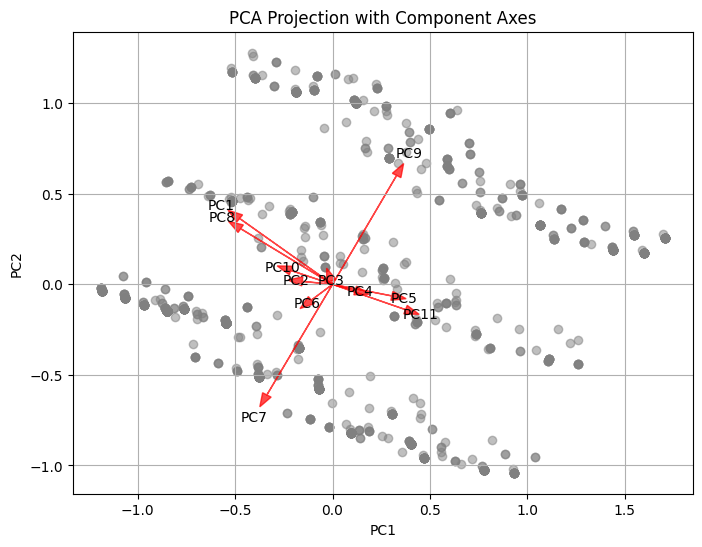

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)


for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='red', alpha=0.7, head_width=0.05)
    plt.text(pc1*1.2, pc2*1.2, f"PC{i+1}", color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Component Axes")
plt.grid(True)
plt.show()

##  Step5: Extracting Segments

### 1.Using k-Means

In [ ]:
np.random.seed(1234)

def step_kmeans(data, k_range, n_init=10):
    models = {}
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        kmeans.fit(data)
        models[k] = kmeans
    return models

k_range = range(2, 9)
MD_km28 = step_kmeans(MD_x, k_range)

def relabel_kmeans(models):
    reference_labels = models[min(models.keys())].labels_
    for k, model in models.items():
        closest, _ = pairwise_distances_argmin_min(model.cluster_centers_, models[min(models.keys())].cluster_centers_)
        model.labels_ = closest[model.labels_]
    return models

MD_km28 = relabel_kmeans(MD_km28)
MD_km28

{2: KMeans(n_clusters=2, n_init=10, random_state=1234),
 3: KMeans(n_clusters=3, n_init=10, random_state=1234),
 4: KMeans(n_clusters=4, n_init=10, random_state=1234),
 5: KMeans(n_clusters=5, n_init=10, random_state=1234),
 6: KMeans(n_clusters=6, n_init=10, random_state=1234),
 7: KMeans(n_clusters=7, n_init=10, random_state=1234),
 8: KMeans(n_init=10, random_state=1234)}

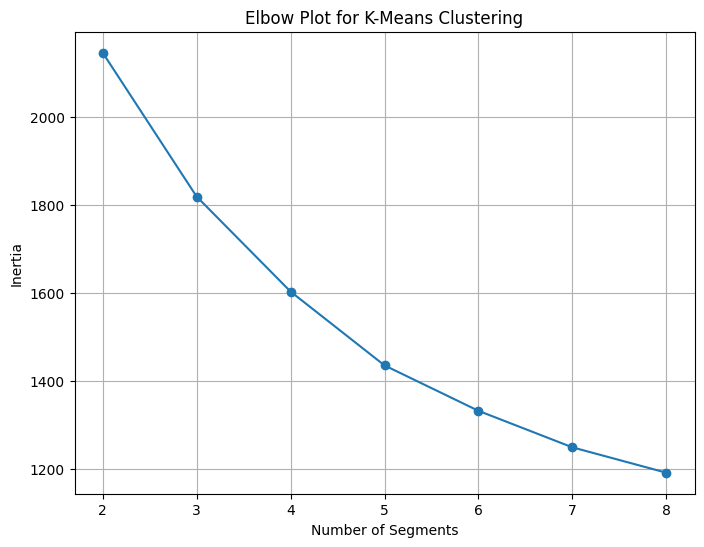

In [ ]:
num_clusters = list(MD_km28.keys())
inertia_values = [model.inertia_ for model in MD_km28.values()]

# Plotting the inertia (or other metric) against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-Means Clustering')
plt.grid(True)
plt.show()

In [21]:
np.random.seed(1234)

def kmeans_clustering(data, k_range, n_init=10):
    models = {}
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        kmeans.fit(data)
        models[k] = kmeans
    return models

def bootstrap_clustering(data, k_range, n_boot=100, n_init=10):
    boot_clusters = {k: [] for k in k_range}
    for _ in range(n_boot):
        boot_sample = resample(data, random_state=np.random.randint(0, 10000))

        models = kmeans_clustering(boot_sample, k_range, n_init)

        for k, model in models.items():
            boot_clusters[k].append(model.inertia_)

    for k in boot_clusters:
        boot_clusters[k] = np.array(boot_clusters[k])

    return boot_clusters

k_range = range(2, 9)
n_boot = 100

MD_b28 = bootstrap_clustering(MD_x, k_range, n_boot)

for k, inertias in MD_b28.items():
    print(f"Number of clusters: {k}")
    print(f"Mean inertia across bootstraps: {np.mean(inertias)}")
    print(f"Standard deviation of inertia: {np.std(inertias)}\n")

Number of clusters: 2
Mean inertia across bootstraps: 2147.93285388065
Standard deviation of inertia: 25.65064196392877

Number of clusters: 3
Mean inertia across bootstraps: 1822.762592970137
Standard deviation of inertia: 28.41368278071288

Number of clusters: 4
Mean inertia across bootstraps: 1605.563722875237
Standard deviation of inertia: 28.588946276094816

Number of clusters: 5
Mean inertia across bootstraps: 1446.808921111923
Standard deviation of inertia: 28.95253975046163

Number of clusters: 6
Mean inertia across bootstraps: 1340.521295662699
Standard deviation of inertia: 28.403814440222906

Number of clusters: 7
Mean inertia across bootstraps: 1257.5651427542375
Standard deviation of inertia: 30.235208117420452

Number of clusters: 8
Mean inertia across bootstraps: 1184.4676544757037
Standard deviation of inertia: 28.725273368692353



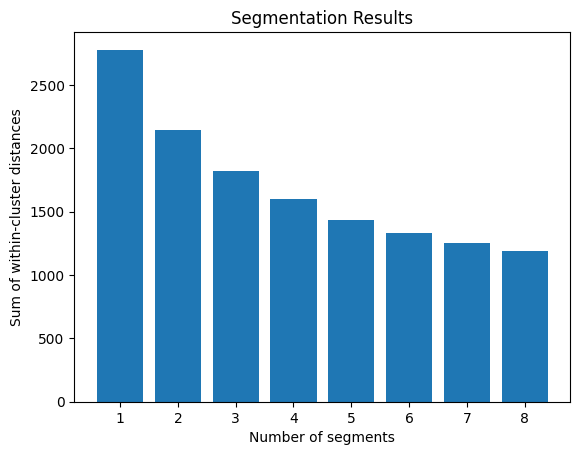

In [29]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

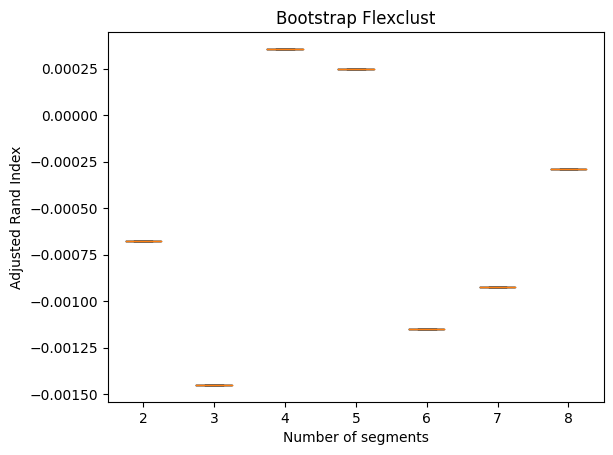

In [34]:
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

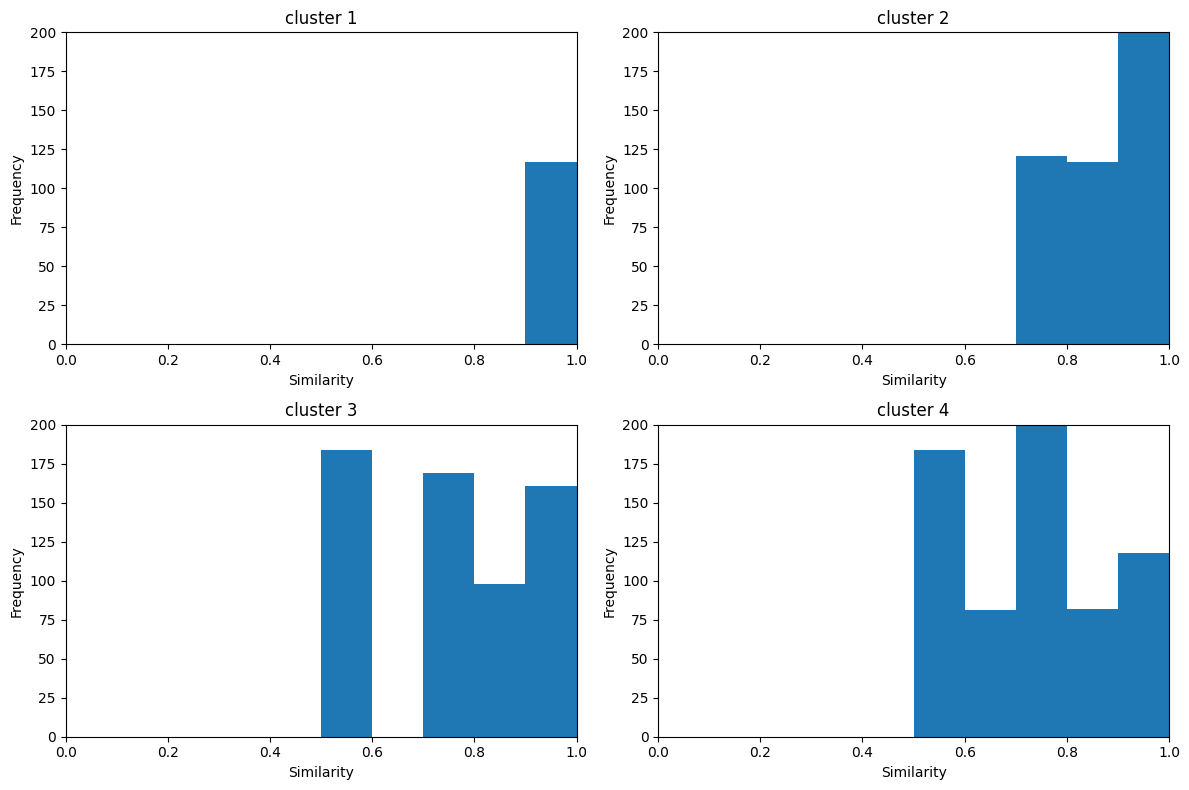

In [36]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

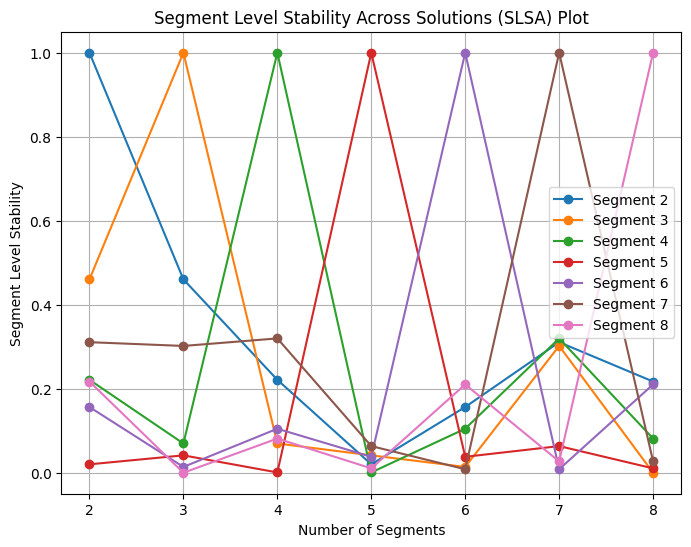

In [38]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

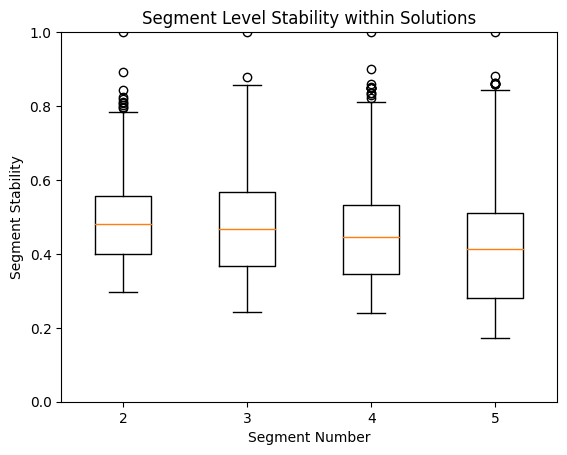

In [39]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [42]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


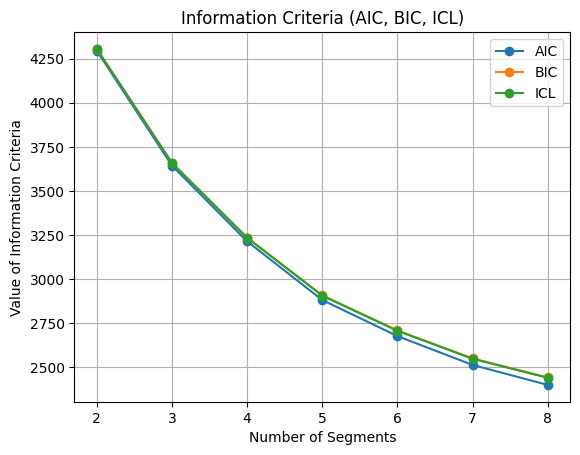

In [43]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [44]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


In [46]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

like_counts = pd.value_counts(mcdonalds['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807
Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


<ipython-input-46-f55d98b95635>:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(mcdonalds['Like'])


In [47]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)


like_n_counts = mcdonalds['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [48]:
from patsy import dmatrices

independent_vars = mcdonalds.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=mcdonalds)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [49]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=mcdonalds)
y = dmatrix('Like', data=mcdonalds)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


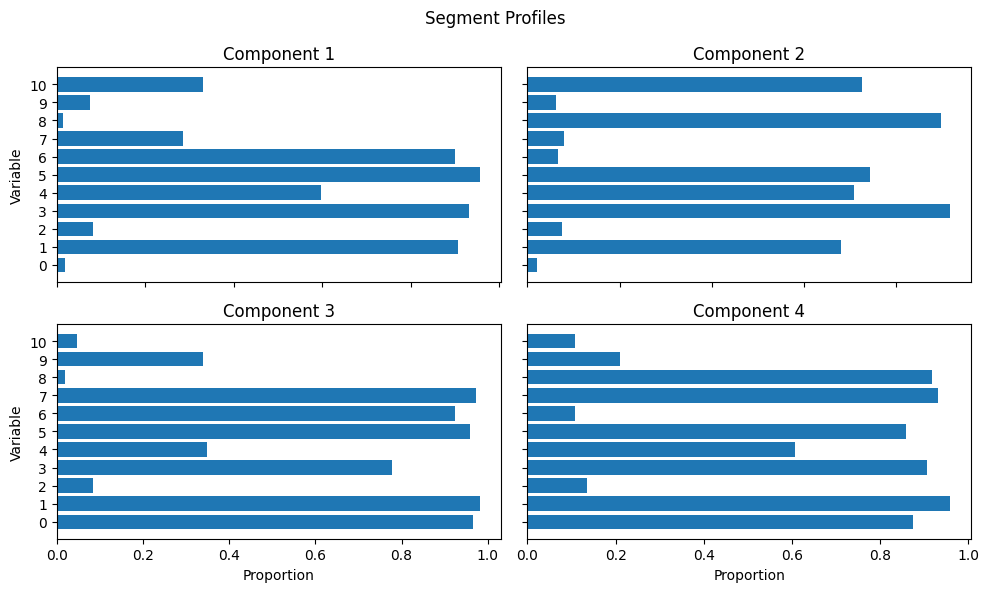

In [53]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_x_df = pd.DataFrame(MD_x)
MD_mean = MD_x_df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x_df.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


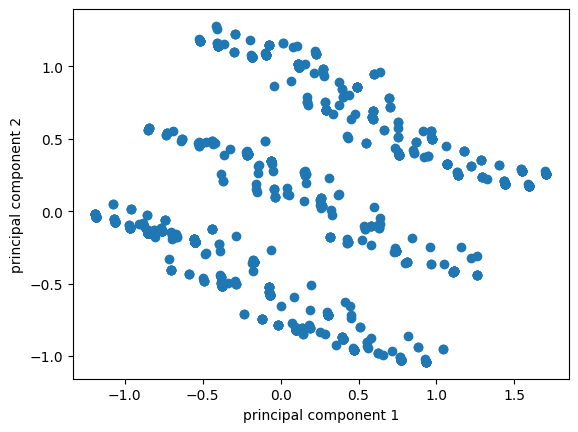

In [54]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


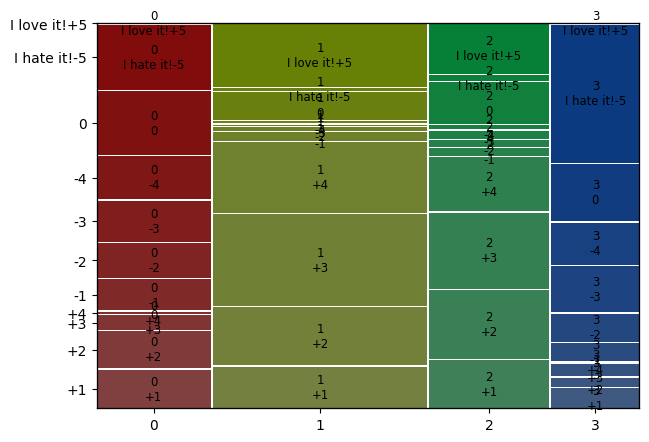

In [57]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonalds[x] = LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdonalds
df_eleven = mcdonalds.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
mcdonalds['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Like'])

mcdonalds
actual_column_names = crosstab.columns.tolist()

crosstab = crosstab[actual_column_names]

plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

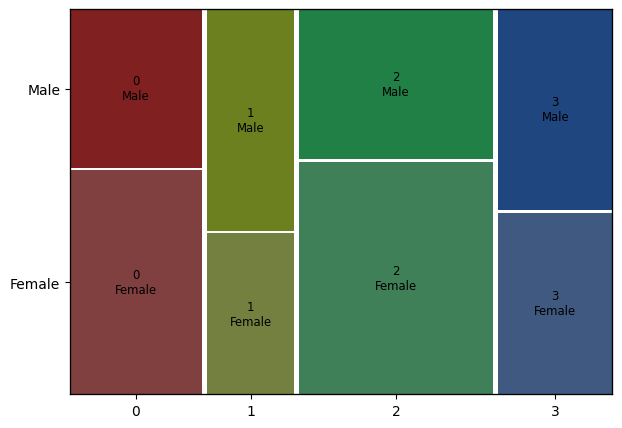

In [59]:
MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

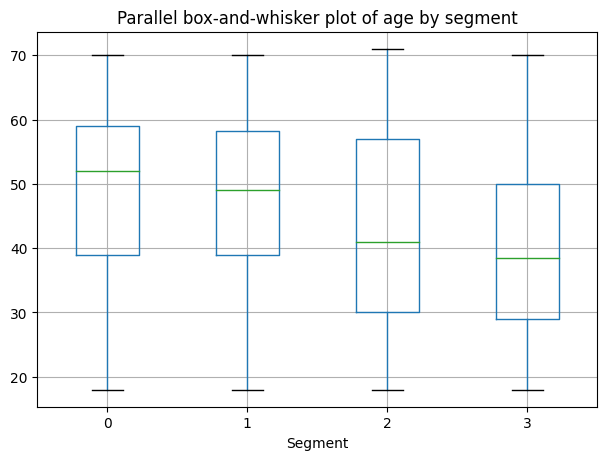

In [60]:
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [61]:
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [62]:
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [63]:
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


In [64]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.407767,5.423948,2.809061
1,1,0.398276,3.794828,2.584483
2,2,0.521605,3.808642,2.540123
3,3,0.579167,6.775000,2.679167


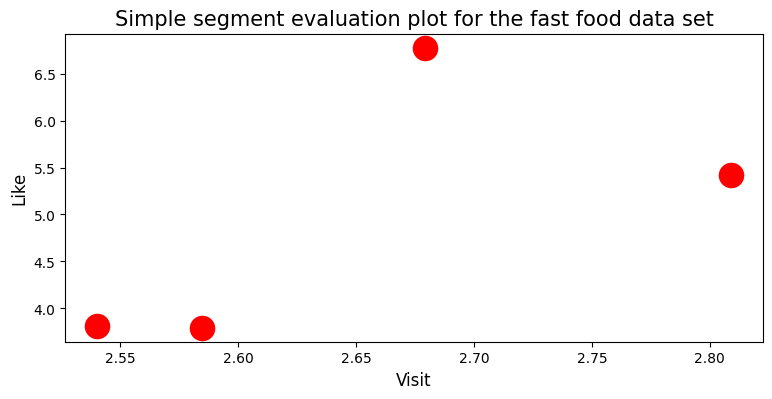

In [65]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()